In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn import linear_model, preprocessing



In [5]:
df_de_state =pd.read_excel('data_for_training_preprocessing.xlsx',sheet_name='sheet1', engine='openpyxl')
df_de_it =pd.read_excel('data_for_training_preprocessing.xlsx',sheet_name='sheet2', engine='openpyxl')
df_de =pd.read_excel('data_for_training_preprocessing.xlsx',sheet_name='sheet3',index_col=0, engine='openpyxl')
df_oog =pd.read_excel('data_for_training_preprocessing.xlsx',sheet_name='sheet4',index_col=0, engine='openpyxl')
df_sf6 =pd.read_excel('data_for_training_preprocessing.xlsx',sheet_name='sheet5',index_col=0, engine='openpyxl')
df_ldc =pd.read_excel('data_for_training_preprocessing.xlsx',sheet_name='sheet6',index_col=0, engine='openpyxl')


In [6]:
df_de_state.head()

,State,Year,Emission in metric tons
0,AK,2020,227011.06
1,AL,2020,428724.98
2,AR,2020,332116.35
3,AZ,2020,487898.79
4,CA,2020,240849.09


In [7]:
df_de_it.head()

,IT_sectors,Year,Emission in metric tons
0,Chemicals,2020,318311.27
1,"Chemicals,Coal-based Liquid Fuel Supply,Suppli...",2020,3230507.30
2,"Chemicals,Industrial Gas Suppliers",2020,281269.82
3,"Chemicals,Industrial Gas Suppliers,Minerals",2020,49540.27
4,"Chemicals,Industrial Gas Suppliers,Waste",2020,32761.46


In [8]:
df_de.describe()

,FRS_Id,Zip Code,Latitude,Longitude,Primary_NAICS_Code,2020,2019,2018,2017,2016,...,2015_perc_change,2015_change_pattern,2016_perc_change,2016_change_pattern,2017_perc_change,2017_change_pattern,2018_perc_change,2018_change_pattern,2019_perc_change,2019_change_pattern
count,6.405000e+03,6515.000000,6515.000000,6515.000000,6515.000000,6.515000e+03,6.515000e+03,6.515000e+03,6.515000e+03,6.515000e+03,...,6512.0,6515.000000,6513.0,6515.000000,6512.0,6515.000000,6507.0,6515.000000,6505.0,6515.000000
mean,1.100244e+11,53978.809977,37.315360,-92.479267,364410.079202,3.684321e+05,4.064988e+05,4.352801e+05,4.314888e+05,4.474238e+05,...,-inf,0.555948,-inf,0.556869,-inf,0.528933,-inf,0.382809,-inf,0.524635
std,2.408523e+07,27107.727878,5.978644,16.760792,143584.980862,1.064542e+06,1.180335e+06,1.277499e+06,1.275032e+06,1.279495e+06,...,NaN,0.496898,NaN,0.496794,NaN,0.499200,NaN,0.486110,NaN,0.499431
min,1.100003e+11,0.000000,13.394900,-174.113611,111419.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-inf,0.000000,-inf,0.000000,-inf,0.000000,-inf,0.000000,-inf,0.000000
25%,1.100015e+11,32213.000000,32.904403,-97.801833,221112.000000,3.126729e+04,3.493267e+04,3.614736e+04,3.647170e+04,3.726029e+04,...,-8.0,0.000000,-7.0,0.000000,-7.0,0.000000,-13.0,0.000000,-8.0,0.000000
50%,1.100144e+11,55024.000000,37.785556,-90.212800,325199.000000,6.320322e+04,7.040830e+04,7.578675e+04,7.687800e+04,8.123944e+04,...,2.0,1.000000,2.0,1.000000,1.0,1.000000,-2.0,0.000000,1.0,1.000000
75%,1.100438e+11,77488.000000,41.242651,-82.604299,486210.000000,1.794937e+05,2.156112e+05,2.668058e+05,2.984203e+05,3.633972e+05,...,9.0,1.000000,11.0,1.000000,11.0,1.000000,6.0,1.000000,12.0,1.000000
max,1.100711e+11,99801.000000,71.292071,144.891130,928110.000000,1.723290e+07,1.916974e+07,1.842964e+07,2.079817e+07,1.973314e+07,...,114246.0,1.000000,14194.0,1.000000,100.0,1.000000,100.0,1.000000,100.0,1.000000


In [9]:
df_de.columns

Index(['FRS_Id', 'Facility_Name', 'City', 'State', 'Zip Code', 'Address',
       'County', 'Latitude', 'Longitude', 'Primary_NAICS_Code', 'IT_subparts',
       'IT_sectors', '2020', '2019', '2018', '2017', '2016', '2015', '2014',
       '2013', '2012', '2011', '2020_perc_change', '2020_change_pattern',
       '2012_perc_change', '2012_change_pattern', '2013_perc_change',
       '2013_change_pattern', '2014_perc_change', '2014_change_pattern',
       '2015_perc_change', '2015_change_pattern', '2016_perc_change',
       '2016_change_pattern', '2017_perc_change', '2017_change_pattern',
       '2018_perc_change', '2018_change_pattern', '2019_perc_change',
       '2019_change_pattern'],
      dtype='object')

In [10]:
df_de.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6515 entries, 1004377 to 1011696
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FRS_Id               6405 non-null   float64
 1   Facility_Name        6515 non-null   object 
 2   City                 6515 non-null   object 
 3   State                6515 non-null   object 
 4   Zip Code             6515 non-null   int64  
 5   Address              6038 non-null   object 
 6   County               6261 non-null   object 
 7   Latitude             6515 non-null   float64
 8   Longitude            6515 non-null   float64
 9   Primary_NAICS_Code   6515 non-null   int64  
 10  IT_subparts          6515 non-null   object 
 11  IT_sectors           6515 non-null   object 
 12  2020                 6515 non-null   float64
 13  2019                 6515 non-null   float64
 14  2018                 6515 non-null   float64
 15  2017                 6515 non

# Dropping the column with null values

In [11]:
df_de.drop(['FRS_Id'], axis=1, inplace=True)

In [12]:
#correlation between the chosen features
df_de.corr()

,Zip Code,Latitude,Longitude,Primary_NAICS_Code,2020,2019,2018,2017,2016,2015,...,2015_perc_change,2015_change_pattern,2016_perc_change,2016_change_pattern,2017_perc_change,2017_change_pattern,2018_perc_change,2018_change_pattern,2019_perc_change,2019_change_pattern
Zip Code,1.000000,-0.063065,-0.693603,-0.028343,0.017572,0.016953,0.012113,0.008991,0.002575,0.006953,...,-0.010925,-0.011166,0.012339,0.028235,0.018095,-0.043143,0.008018,-0.004510,-0.023256,-0.078887
Latitude,-0.063065,1.000000,-0.148892,0.040426,-0.039519,-0.033699,-0.031186,-0.029003,-0.033302,-0.031521,...,0.005904,-0.023947,0.002735,-0.010531,-0.011100,-0.042092,0.011671,0.035331,0.010686,0.013240
Longitude,-0.693603,-0.148892,1.000000,0.040631,0.009452,0.009275,0.013322,0.014740,0.018683,0.015669,...,-0.003010,0.045961,-0.010847,-0.011885,-0.011509,0.023847,-0.005347,-0.018059,0.012580,0.059199
Primary_NAICS_Code,-0.028343,0.040426,0.040631,1.000000,-0.226516,-0.225320,-0.222622,-0.216491,-0.224069,-0.226700,...,0.006352,-0.012006,0.012132,0.003630,0.012420,-0.053689,0.003909,0.007956,0.006681,-0.074182
2020,0.017572,-0.039519,0.009452,-0.226516,1.000000,0.973522,0.953903,0.941323,0.924452,0.909017,...,0.007539,-0.020620,-0.038148,-0.027409,0.001902,-0.027172,0.004804,-0.002599,0.006083,0.018031
2019,0.016953,-0.033699,0.009275,-0.225320,0.973522,1.000000,0.980539,0.967608,0.954231,0.941964,...,0.008469,-0.005828,-0.027759,-0.020302,0.003919,-0.023832,0.004679,-0.006122,0.006162,0.022819
2018,0.012113,-0.031186,0.013322,-0.222622,0.953903,0.980539,1.000000,0.984697,0.973432,0.958177,...,0.008442,0.005662,-0.025414,-0.014219,0.003087,-0.021428,0.004641,-0.015657,0.010175,0.079900
2017,0.008991,-0.029003,0.014740,-0.216491,0.941323,0.967608,0.984697,1.000000,0.983437,0.966489,...,0.006724,0.012531,-0.024811,-0.011521,0.002742,-0.027043,0.005007,0.036569,0.006279,0.072827
2016,0.002575,-0.033302,0.018683,-0.224069,0.924452,0.954231,0.973432,0.983437,1.000000,0.982693,...,0.005891,0.014017,-0.017011,-0.013193,0.004368,0.026653,0.004733,0.026764,0.006349,0.071087
2015,0.006953,-0.031521,0.015669,-0.226700,0.909017,0.941964,0.958177,0.966489,0.982693,1.000000,...,0.005700,0.015800,0.005992,0.040846,0.004428,0.021433,0.004660,0.023585,0.006457,0.072484


ValueError: autodetected range of [-inf, 100.0] is not finite

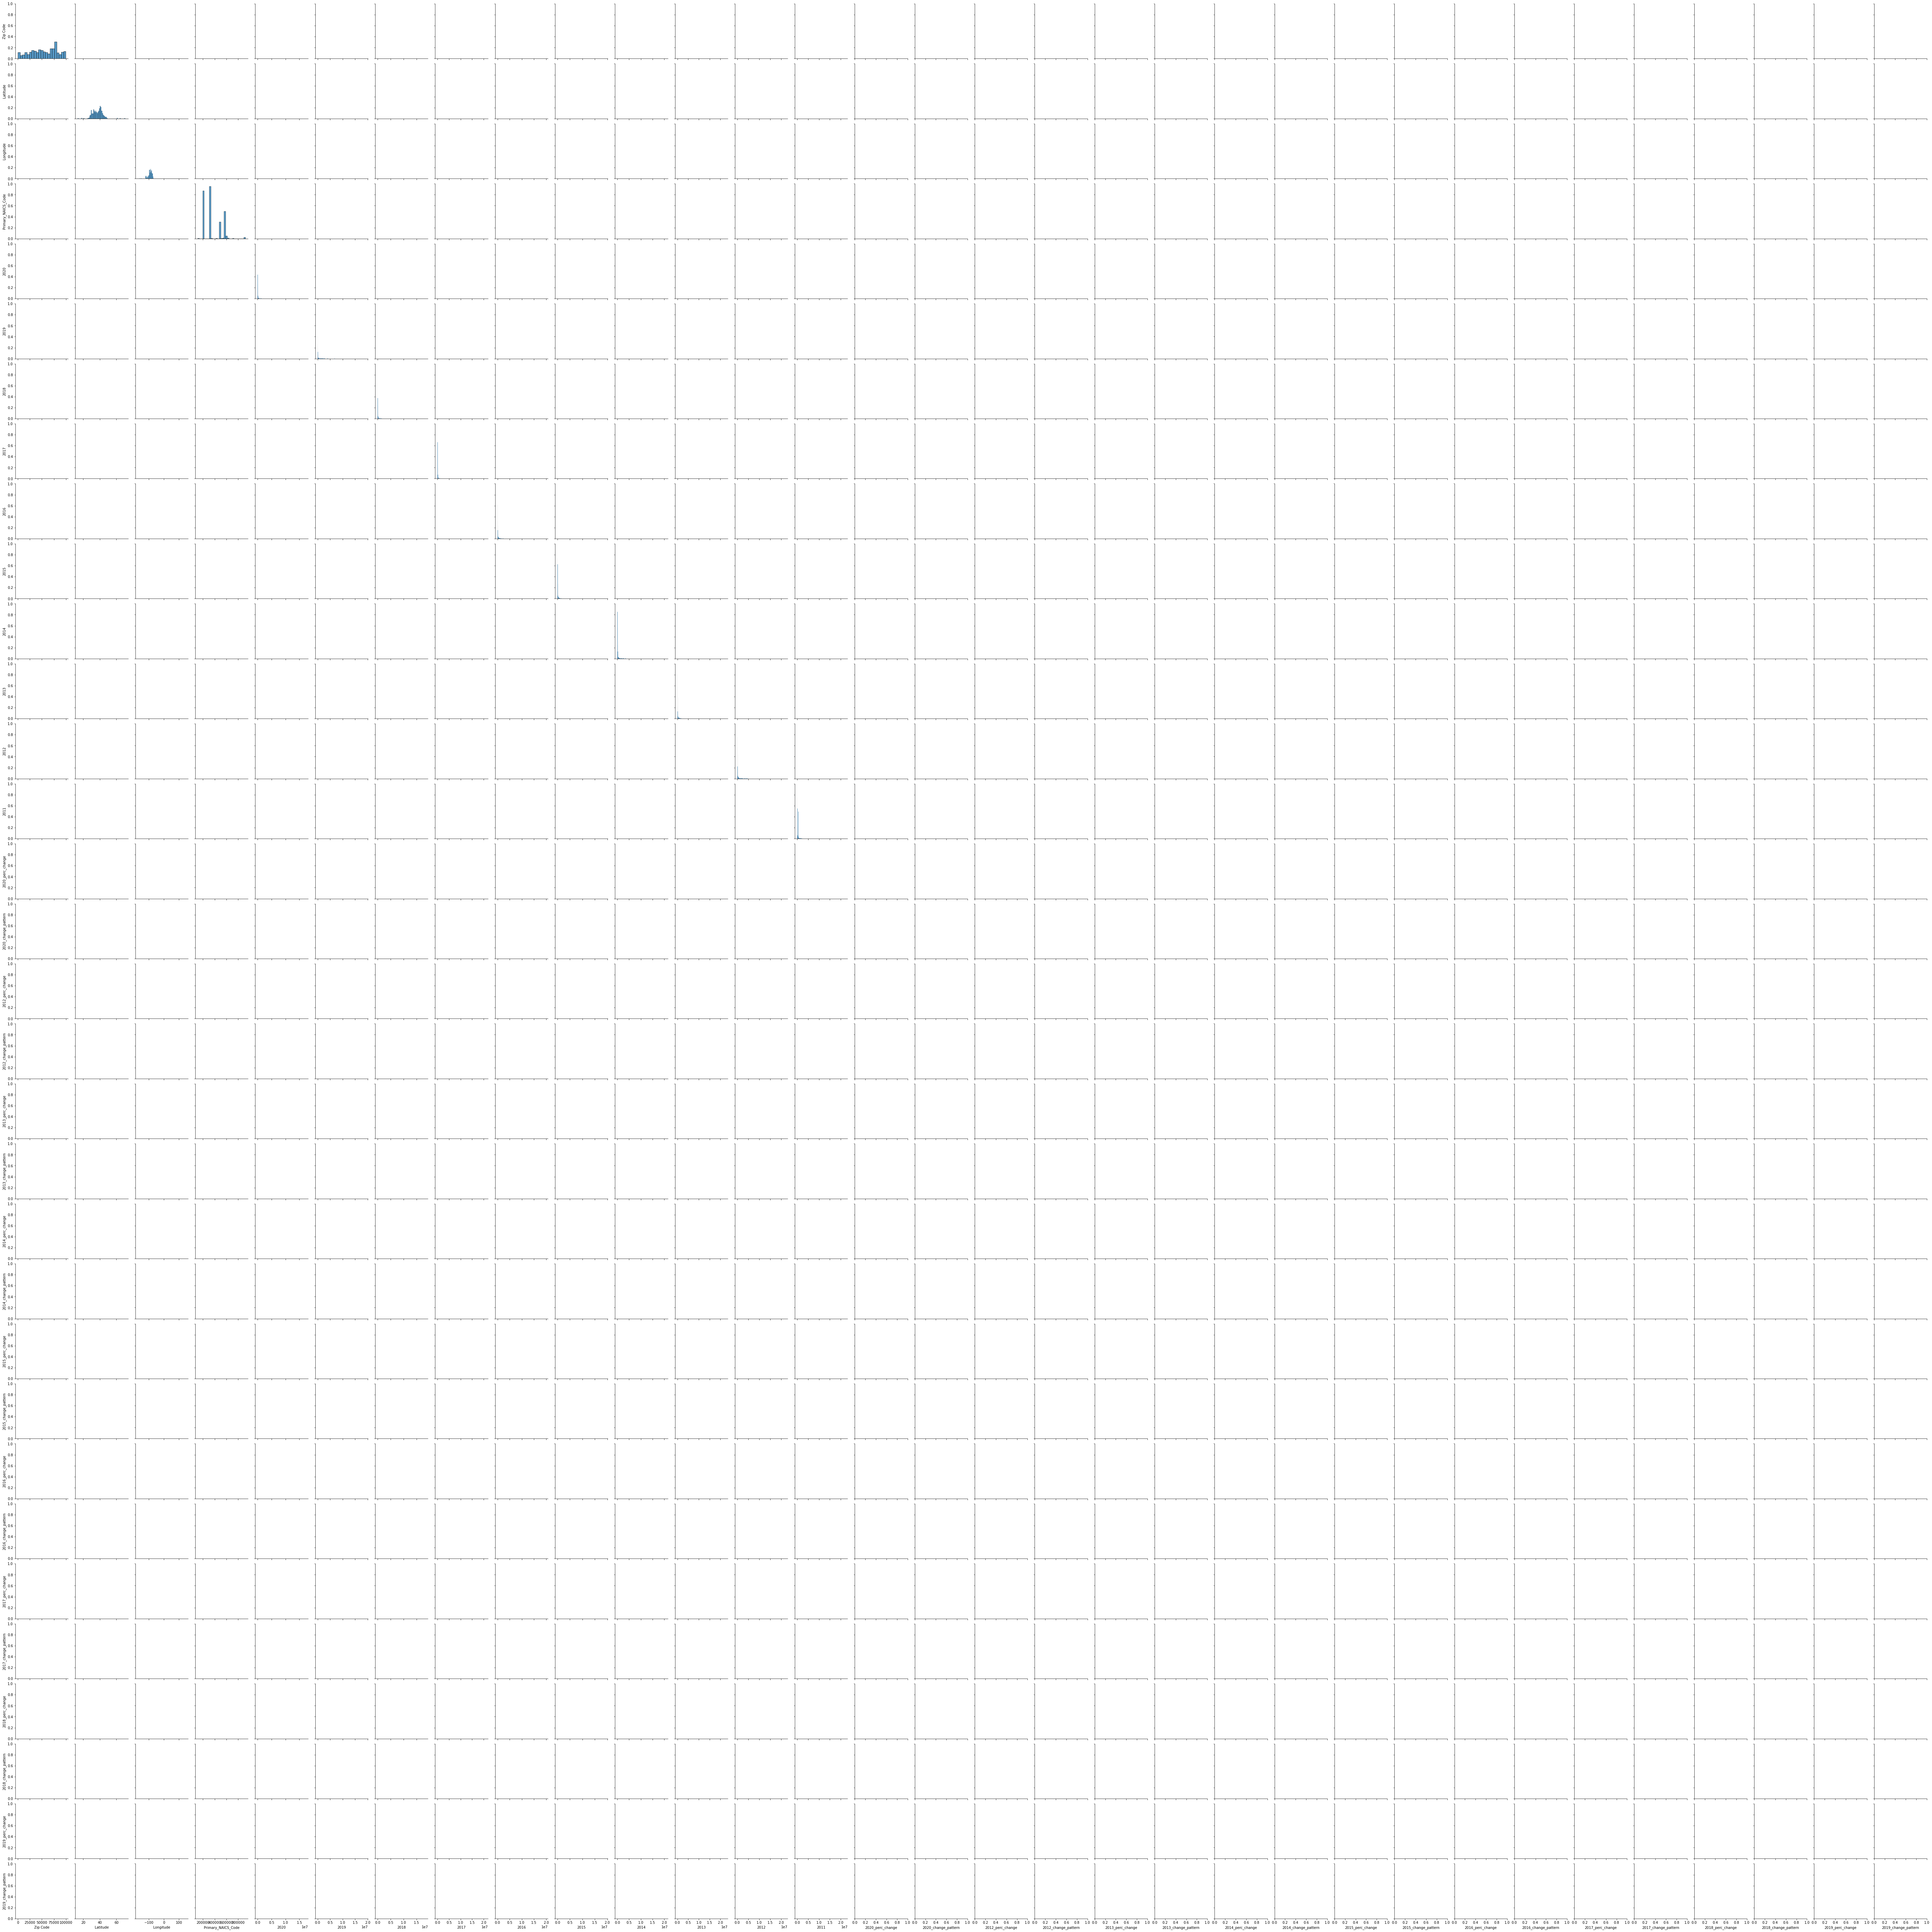

In [13]:
sns.pairplot(df_de)

<AxesSubplot:>

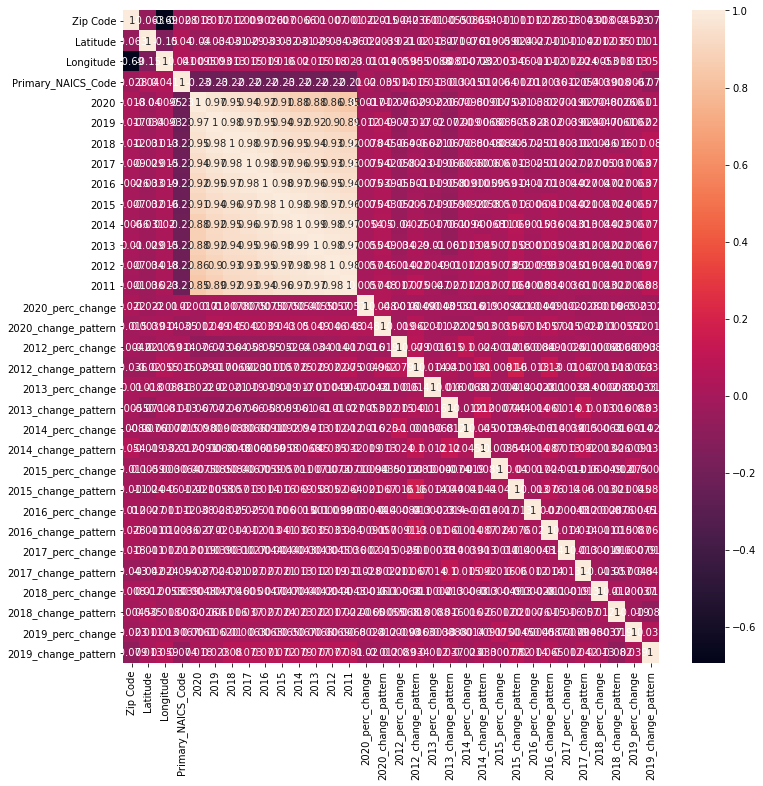

In [14]:
plt.figure(figsize=(12,12))
sns.heatmap(df_de.corr(),annot=True)

#### <font color= brown>*Both the charts clearly show that correlation between the emissions in different years is high.* We already noticed this in numbers while using the corr method. The correlation between the emission data for the year 2019 and 2020 is precisely 0.97.</font> 

<AxesSubplot:xlabel='2019', ylabel='2020'>

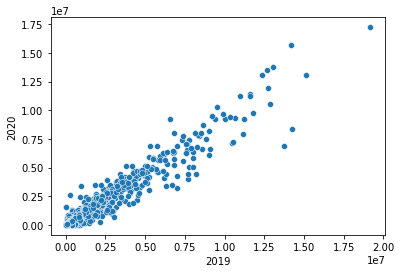

In [16]:
sns.scatterplot(x=df_de['2019'],y=df_de['2020'])

<AxesSubplot:xlabel='2019', ylabel='2020'>

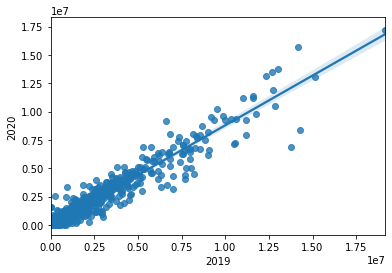

In [17]:
sns.regplot(x=df_de['2019'],y=df_de['2020'],data='df_de')

# Linear regression model using OLS

In [18]:
X=df_de[['Latitude','Longitude', '2019', '2018', '2017', '2016', '2015', '2014',
       '2013', '2012', '2011']]
X=sm.add_constant(X)
y = df_de[['2020']]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=123)

In [20]:
rModel1 = sm.OLS(y_train, X_train)
rModel1_results = rModel1.fit()
rModel1_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   2020   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     9391.
Date:                Thu, 03 Mar 2022   Prob (F-statistic):               0.00
Time:                        15:57:23   Log-Likelihood:                -67155.
No. Observations:                4886   AIC:                         1.343e+05
Df Residuals:                    4874   BIC:                         1.344e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.987e+04    2.5e+04      2.397      0.017    1.09e+04    1.09e+05
Latitude    -908.8372    544.800     -1.668      0.095   -1976.890     159.216
Longitude    143.2024    190.653      0.751      0.453    -230.564     516.969
2019           0.8471      0.014     59.287      0.000       0.819       0.875
2018          -0.0056      0.019     -0.297      0.767      -0.042       0.031
2017           0.1724      0.019      9.158      0.000       0.135       0.209
2016          -0.0483      0.020     -2.372      0.018      -0.088      -0.008
2015           0.2009      0.018     11.101      0.000       0.165       0.236
2014          -0.2037      0.018    -11.534      0.000      -0.238      -0.169
2013          -0.0152      0.017     -0.898      0.369      -0.049       0.018
2012          -0.0469      0.015     -3.044      0.002      -0.077      -0.017
2011           0.0049      0.012      0.401      0.688      -0.019       0.029
==============================================================================
Omnibus:                     2140.849   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1466850.700
Skew:                          -0.631   Prob(JB):                         0.00
Kurtosis:                      87.874   Cond. No.                     3.25e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.25e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

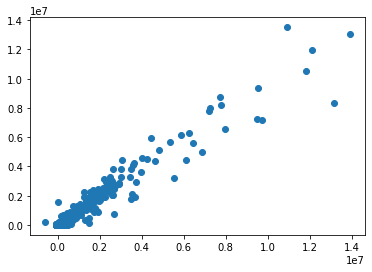

In [21]:
y_pred = rModel1_results.predict(X_test)
plt.scatter(y_pred, y_test)


In [22]:
import math

print('Mean squared error of OLS model, lesser features', mean_squared_error(y_test, y_pred))
print('SQRT of R-squared', math.sqrt(mean_squared_error(y_test, y_pred)))
print('Mean absolute error of OLS model, lesser features', mean_absolute_error(y_test, y_pred))
print('R-sqruared', rModel1_results.rsquared)

Mean squared error of OLS model, lesser features 67299104876.27368
SQRT of R-squared 259420.71019152206
Mean absolute error of OLS model, lesser features 80557.715047278
R-sqruared 0.954945478229788


# One-hot encoded for States

In [23]:
X = df_de.drop(['2020','Facility_Name', 'City', 'State', 'Zip Code', 'Address',
       'County','Primary_NAICS_Code', 'IT_subparts', 'IT_sectors','Primary_NAICS_Code'],axis = 1)
st_dummies=pd.get_dummies(df_de['State'])
X_st = X.join(st_dummies)


In [24]:
y_st=df_de[['2020']]
y_st.shape

(6515, 1)

In [25]:
X_st_train, X_st_test, y_st_train, y_st_test=train_test_split(X_st, y_st, test_size = 0.25, random_state = 246)
X_st_train.columns

Index(['Latitude', 'Longitude', '2019', '2018', '2017', '2016', '2015', '2014',
       '2013', '2012', '2011', '2020_perc_change', '2020_change_pattern',
       '2012_perc_change', '2012_change_pattern', '2013_perc_change',
       '2013_change_pattern', '2014_perc_change', '2014_change_pattern',
       '2015_perc_change', '2015_change_pattern', '2016_perc_change',
       '2016_change_pattern', '2017_perc_change', '2017_change_pattern',
       '2018_perc_change', '2018_change_pattern', '2019_perc_change',
       '2019_change_pattern', 'AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC',
       'DE', 'FL', 'GA', 'GU', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA',
       'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH',
       'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD',
       'TN', 'TX', 'UT', 'VA', 'VI', 'VT', 'WA', 'WI', 'WV', 'WY'],
      dtype='object')

In [26]:
rModel_oh_st = sm.OLS(y_st_train, X_st_train)

MissingDataError: exog contains inf or nans

In [ ]:
rModel_oh_st_results = rModel_oh_st.fit()
rModel_oh_st_results.summary()

In [ ]:
y_st_pred = rModel_oh_st_results.predict(X_st_test)

In [ ]:
plt.scatter(x=y_st_pred,y= y_st_test)


In [ ]:
print('Mean squared error of OLS model, States one-hot encoded', mean_squared_error(y_st_test, y_st_pred))
print('SQRT of R-squared', math.sqrt(mean_squared_error(y_st_test, y_st_pred)))
print('Mean absolute error of OLS model, States one-hot encoded', mean_absolute_error(y_st_test, y_st_pred))
print('R-sqruared', rModel_oh_st_results.rsquared)

# one-hot encoded on IT_sectors 

In [ ]:
it_encoded = pd.get_dummies(df_de['IT_sectors'])
X_it = X.join(it_encoded)

print(X_it.shape,it_encoded.shape)

In [ ]:
X_it.head()

In [ ]:
X_it = sm.add_constant(X_it)

y_it= df_de[['2020']]
X_it_train, X_it_test, y_it_train, y_it_test=train_test_split(X_it, y_it, test_size = 0.25, random_state = 246)

rModel2_oh_it = sm.OLS(y_it_train, X_it_train)
rModel2_oh_it_results = rModel2_oh_it.fit()
rModel2_oh_it_results.summary()

In [ ]:
y_it_pred = rModel2_oh_it_results.predict(X_it_test)
plt.scatter(x=y_it_pred,y= y_it_test)
plt.title("Regression after one-hot encoding on IT Sectors")

for future in futures(1 to 10 years):
    X = features[1:10]
    y= target[11]
    yfuture=model.predict(y)
    X.drop(features[1])
    shift columns from 2 to 10, to 1 to 9
    X[10] = yfuture
    
fit the model for 7 years and predict 3 years

other metrics to evaluate..

In [ ]:
print('Mean squared error of OLS model, IT sectors one-hot encoded', mean_squared_error(y_it_test, y_it_pred))
print('SQRT of R-squared', math.sqrt(mean_squared_error(y_it_test, y_it_pred)))
print('Mean absolute error of OLS model, IT sectors one-hot encoded', mean_absolute_error(y_it_test, y_it_pred))
print('R-sqruared', rModel2_oh_it_results.rsquared)

C:\Users\Radhai\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


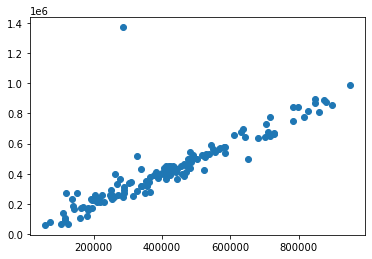

In [27]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

# separate into input and output columns
X_st= df_de_state.drop('Emission in metric tons', axis =1)
y_st= df_de_state[['Emission in metric tons']]

# split the dataset into train and test sets
X_train, X_test, y_train, y_test=train_test_split(X_st, y_st, test_size = 0.25, random_state = 246)


# one-hot encode input variables
onehot_encoder = OneHotEncoder(drop='first')
onehot_encoder.fit(X_train)
X_train = onehot_encoder.transform(X_train)
X_test = onehot_encoder.transform(X_test)

# ordinal encode target variable
label_encoder = LabelEncoder()
label_encoder.fit(y_train)




rModel_onehot_st = linear_model.LinearRegression(normalize=True)
rModel_onehot_st_results = rModel_onehot_st.fit(X_train,y_train)
# evaluate predictions
ypred = rModel_onehot_st.predict(X_test)
plt.scatter(x=ypred,y = y_test)


In [28]:
print(mean_squared_error(y_test, ypred))
print(math.sqrt(mean_squared_error(y_test, ypred)))
print(mean_absolute_error(y_test, ypred))

10982643197.511654
104798.10684125766
41919.49655679584


### Time Series Analysis -- Arima Model

In [ ]:
#import adfuller

from statsmodels.tsa.stattools import adfuller

#method to test the stationarity
def test_stationarity(timeseries):
    rol_mean = timeseries.rolling(5).mean()
    rol_std = timeseries.rolling(5).std()
    orig = plt.plot(timeseries, color = 'blue',label='original')
    mean = plt.plot(rol_mean, color ='red', label = 'Rolling mean')
    std = plt.plot(rol_std, color = 'green', label = 'Rolling std')
    plt.legend(loc='best')
    plt.title('Rolling mean and std')
    plt.show(block = False)
    
    print('Results of Dickey Fuller Test')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', 'Lags used', 'Number of observations used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    from matplotlib.pylab import rcParams
    rcParams['figure.figsize'] = 20,10
    

#X_train = df_de_state[df_de_state['Year']>=2019]

#X_test = df_de_state[df_de_state['Year']< 2019]
#test_stationarity(X_train['Emission in metric tons'])
    


In [ ]:
#columns of the Direct Emission dataset
df_de.columns


In [ ]:
#resetting the index to build a time series
df_de_ts = df_de.reset_index()

In [ ]:
#choosing the state and the emission columns from 2011-2020
df_de_st_ts = df_de_ts[['State','2020', '2019', '2018', '2017', '2016', '2015', '2014',
       '2013', '2012', '2011' ]]

df_de_st_ts.head()

In [ ]:
#setting 'State' as index column
df_de_st_ts.set_index('State',inplace=True)

In [ ]:
#melting the data to bring all the yearly data into a single feature to facilitate time series model
df = pd.melt(df_de_st_ts,ignore_index=False, var_name=['Year'],value_name="Emission in metric tons").reset_index()

In [ ]:
df.head()

In [ ]:
#slicing the data for Illinois state alone
df_IL=df[df['State'] == 'IL']
df_IL.info()

In [ ]:
#converting the Year column to numeric
num_year = pd.to_numeric(df_IL['Year'])
df_IL['Year'] = num_year
num_year

In [ ]:
#checking for Null values
df_IL.info()

In [ ]:
#splitting the date to training and testing sets
X_train = df_IL.loc[df_IL['Year'].isin([2011,2012,2013,2014,2015,2016,2017,2018,2019])]

X_test = df_IL.loc[df_IL['Year'] == 2020]


In [ ]:
X_train.shape, X_test.shape

In [ ]:
#testing the stationarity of the training data
test_stationarity(X_train['Emission in metric tons'])

#### <font color=brown> Test Statistic is greater than the critical value, hence the series is not stationary.</font>

In [ ]:
X_test

In [ ]:
#Removing the trend

import pandas as pd
train_log = np.log(X_train['Emission in metric tons'])
test_log = np.log(X_test['Emission in metric tons'])
moving_avg = train_log.rolling(5).mean()
plt.plot(train_log)
plt.plot(moving_avg, color='red')
plt.show()


In [ ]:
train_log_ma_diff = train_log - moving_avg

In [ ]:
train_log_ma_diff.dropna(inplace=True)


In [ ]:
test_stationarity(train_log_ma_diff)

#### <font color=brown>Still, the test Statistic is greater than the critical values, hence the series is not stationary.</font>

In [ ]:
train_log_diff = train_log - train_log.shift(1)
np.any(~np.isfinite(train_log_diff),axis=0)

In [ ]:
train_log_diff_finite = np.isfinite(train_log_diff) 


In [ ]:
train_log_diff[train_log_diff_finite]

In [ ]:
test_stationarity(train_log_diff[train_log_diff_finite])

In [ ]:
train_log[~np.isfinite(train_log)]

In [ ]:
train_log[np.isfinite(train_log)]

In [ ]:
train_log_finite = train_log[np.isfinite(train_log)]

In [ ]:
#Removing Stationarity

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(pd.DataFrame(train_log_finite)['Emission in metric tons'].values, period = 2)

In [ ]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


plt.subplot(411)
plt.plot(train_log, label= 'Original')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label= 'Trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label= 'Seasonal')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label= 'residual')
plt.legend(loc = 'best')

In [ ]:
train_log_decompose = pd.DataFrame(residual)
train_log_decompose['Year'] = train_log_finite.index
train_log_decompose.set_index('Year', inplace=True)
train_log_decompose.dropna(inplace= True)
test_stationarity(train_log_decompose)

In [ ]:
#Forecasting the time series

from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(train_log_diff,nlags = 2)
lag_pacf = pacf(train_log_finite, nlags=25, method='ols')

In [ ]:
plt.plot(lag_acf)
plt.show()

In [ ]:
df_de_state.head()

In [ ]:
df_de_ts = df_de.reset_index()

df_de_st_ts = df_de_ts[['State','2020', '2019', '2018', '2017', '2016', '2015', '2014',
       '2013', '2012', '2011' ]]

df_de_st_ts.head()
df_de_st_ts.set_index('State',inplace=True)
df = pd.melt(df_de_st_ts,ignore_index=False, var_name=['Year'],value_name="Emission in metric tons").reset_index()
df.head()
df_IL=df[df['State'] == 'IL']
df_IL.info()
num_year = pd.to_numeric(df_IL['Year'])
df_IL['Year'] = num_year
num_year

### Using fbprophet

In [ ]:
from fbprophet import Prophet
#df_de_ts = df_de.reset_index()

#df_de_st_ts = df_de_ts[['State','2020', '2019', '2018', '2017', '2016', '2015', '2014','2013', '2012', '2011' ]]

#df_de_st_ts.head()
#df_de_st_ts.set_index('State',inplace=True)
#df = pd.melt(df_de,ignore_index=False, var_name=['Year'],value_name="Emission in metric tons").reset_index()
#df.head()
df_IL=df_de_state[df_de_state['State'] == 'IL']
df_IL.info()


In [ ]:
y = pd.to_datetime(df_IL['Year'])
df_IL['Year']=y

In [ ]:
df_IL.columns

In [ ]:
df = df_IL[['Year', 'Emission in metric tons']]

In [ ]:
df = df.rename(columns={'Year':'ds','Emission in metric tons':'y'})

In [ ]:
df.head()

In [ ]:
#m= Prophet()
#m.fit(df)